<h4 id="1&nbsp;&nbsp;为什么有动态规划：" data-toc-modified-id="1&nbsp;&nbsp;为什么有动态规划：-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>为什么有动态规划</h4>
<p>解决穷举时存在的重叠子问题，也可以通过备忘录来优化穷举过程。</p>
<h4 id="2&nbsp;&nbsp;特点：" data-toc-modified-id="2&nbsp;&nbsp;特点：-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>特点</h4>
<p>有自己的状态转移方程，子问题和最优子结构。</p>
<h4 id="3&nbsp;&nbsp;原理：" data-toc-modified-id="3&nbsp;&nbsp;原理：-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>原理</h4>
<p>穷举，将所有答案穷举出来，找最值。</p>
<h4 id="4&nbsp;&nbsp;应用场景:" data-toc-modified-id="4&nbsp;&nbsp;应用场景:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>应用场景</h4>
<p>动态规划一般是用来求最值。比如最长递增子序列，最小编辑距离等等。</p>
<h4 id="5&nbsp;&nbsp;模板：" data-toc-modified-id="5&nbsp;&nbsp;模板：-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>模板</h4>
<p>画出递归树 -&gt; 明确base case -&gt; 明确[状态] -&gt; 明确[选择] -&gt; 定义dp数组/函数的含义</p>
<p><code># 初始化 base case</code><br /><code>dp[0][0] = base</code><br /><code># 状态转移</code><br /><code>for 状态1 in 状态1所有值:</code><br /><code>&nbsp;&nbsp;&nbsp; for 状态2 in 状态2所有值:</code><br /><code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; for ...</code><br /><code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; dp[状态1][状态2][...] = 求最值(选择1，选择2...)</code></p>

<h4 id="6&nbsp;&nbsp;实践" data-toc-modified-id="6&nbsp;&nbsp;实践-6"><a id="6&nbsp;&nbsp;实践-6" class="toc-mod-link"></a><span class="toc-item-num">6&nbsp;&nbsp;</span>实践</h4>
<h5 id="6.1&nbsp;&nbsp;斐波那切数列" data-toc-modified-id="6.1&nbsp;&nbsp;斐波那切数列-6.1"><a id="6.1&nbsp;&nbsp;斐波那切数列-6.1" class="toc-mod-link"></a><span class="toc-item-num">6.1&nbsp;&nbsp;</span>斐波那切数列</h5>
<h6 id="6.1.1&nbsp;&nbsp;画出递归树" data-toc-modified-id="6.1.1&nbsp;&nbsp;画出递归树-6.1.1"><a id="6.1.1&nbsp;&nbsp;画出递归树-6.1.1" class="toc-mod-link"></a><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>画出递归树</h6>
<p>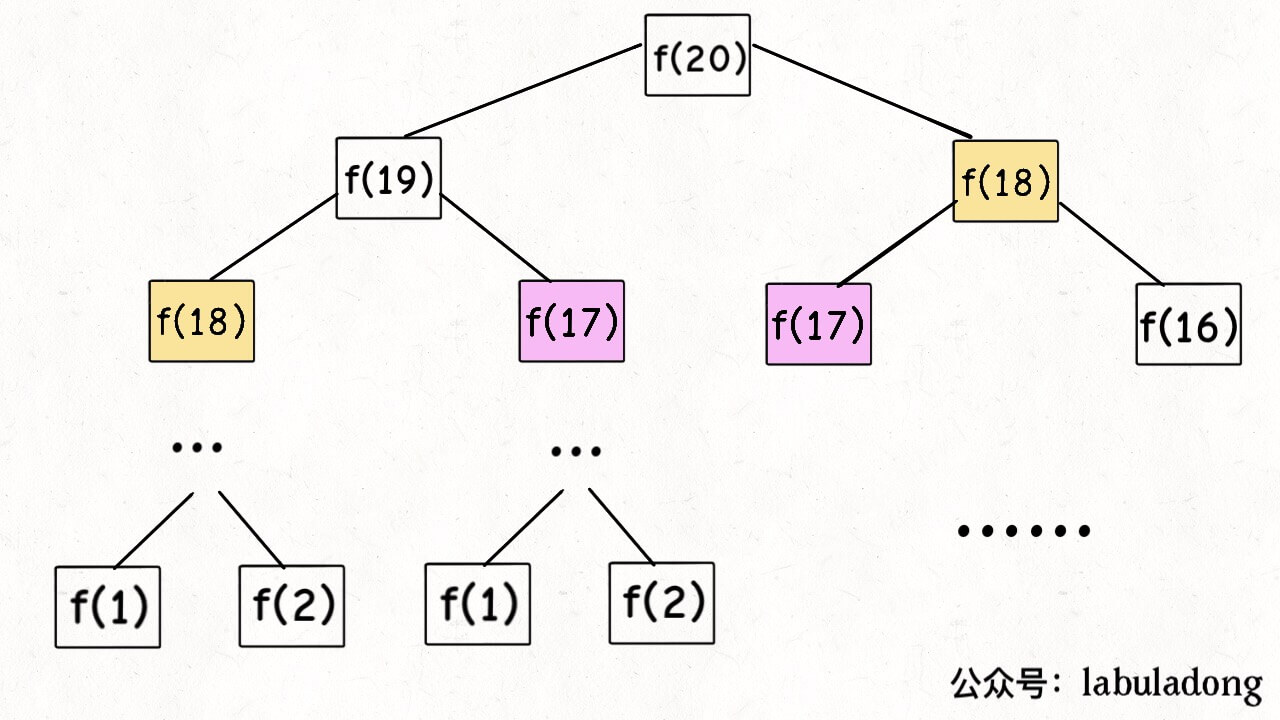</p>
<h6 id="6.1.2&nbsp;&nbsp;子问题" data-toc-modified-id="6.1.2&nbsp;&nbsp;子问题-6.1.2"><a id="6.1.2&nbsp;&nbsp;子问题-6.1.2" class="toc-mod-link"></a><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>子问题</h6>
<p>通过递归树可以看到有需要重复计算的节点，例如两次计算18和两次计算17。这就是重复子问题。</p>
<p><strong>可以使用备忘录的方式解决此问题</strong></p>

In [9]:
def fib(n):
    if n < 1:
        return 0
    my_map = dict()
    return helper(my_map,n)

def helper(map,n):
    if n == 1 or n == 2 :
        return 1
    if n in map:
        return map[n]
    map[n] = helper(map,n-1) + helper(map,n-2)
    return map[n]
num = int(input("请输入数字:"))
print(fib(num))

请输入数字:12
144


<p>上述解法是自顶而下，从大问题开始分解，一般都能够用树来表示。</p>
<p>然而动态规划是自底而上，从问题规模最小的f(1),f(2)往上推，最终得到结果。</p>
<h6 id="画出动态规划表" data-toc-modified-id="画出动态规划表-6.1.3"><a id="画出动态规划表-6.1.3" class="toc-mod-link"></a><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>画出动态规划表</h6>
<p>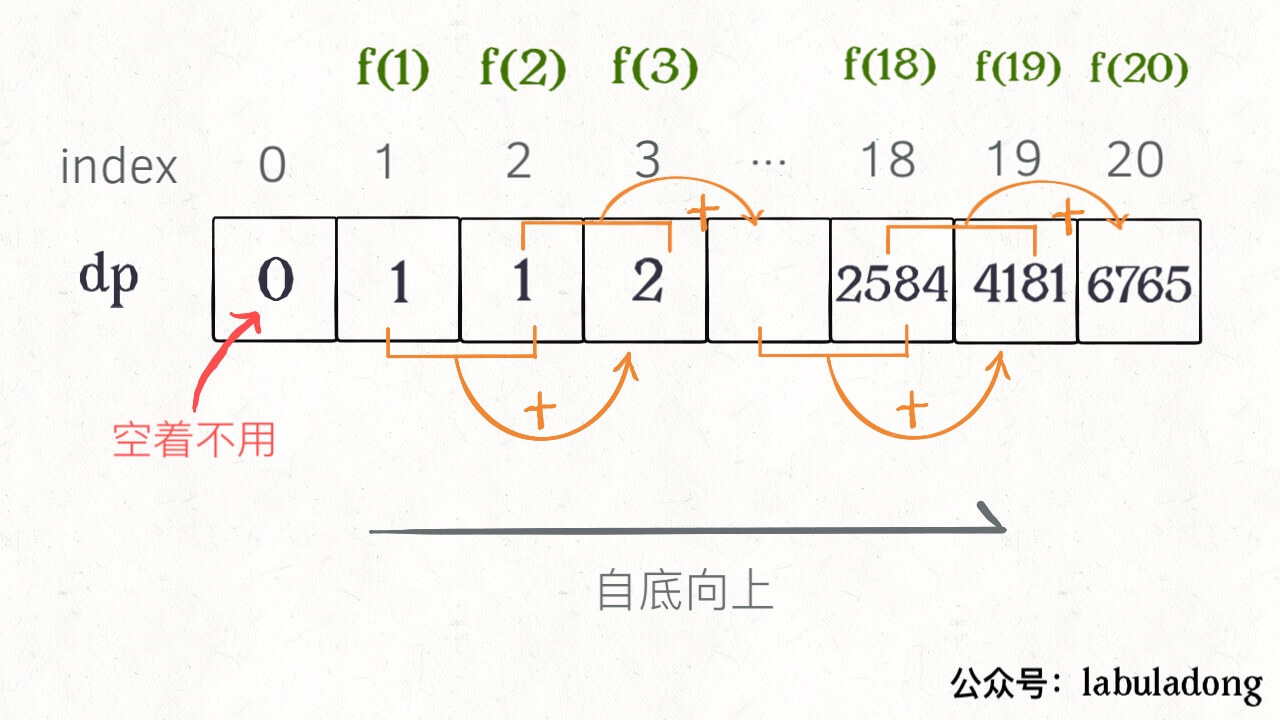</p>
<h6>引出动态转移方程</h6>
<p>&nbsp;</p>
<p>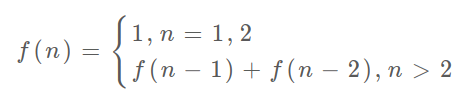</p>

In [12]:
def fib(n):
    if n == 3 or n == 1:
        return 1
    prev = 1
    curr = 1
    for i in range(3,n+1):
        sum = prev + curr
        prev = curr
        curr = sum
    return curr
num = int(input("请输入数字:"))
print(fib(num))

请输入数字:12
144


<h5 id="凑零钱问题" data-toc-modified-id="凑零钱问题-6.2"><a id="凑零钱问题-6.2" class="toc-mod-link"></a><span class="toc-item-num">6.2&nbsp;&nbsp;</span>凑零钱问题</h5>
<h6 id="题目" data-toc-modified-id="题目-6.3">题目</h6>
<p>先看下题目：给你 <code>k</code> 种面值的硬币，面值分别为 <code>c1, c2 ... ck</code>，每种硬币的数量无限，再给一个总金额 <code>amount</code>，问你<strong>最少</strong>需要几枚硬币凑出这个金额，如果不可能凑出，算法返回 -1 。算法的函数签名如下：</p>
<pre class=" language-java"><code class=" language-java"><span class="token comment">// coins 中是可选硬币面值，amount 是目标金额</span>
<span class="token keyword">int</span> <span class="token function">coinChange</span><span class="token punctuation">(</span><span class="token keyword">int</span><span class="token punctuation">[</span><span class="token punctuation">]</span> coins<span class="token punctuation">,</span> <span class="token keyword">int</span> amount<span class="token punctuation">)</span><span class="token punctuation">;</span></code></pre>
<p>比如说 <code>k = 3</code>，面值分别为 1，2，5，总金额 <code>amount = 11</code>。那么最少需要 3 枚硬币凑出，即 11 = 5 + 5 + 1。</p>
<p>你认为计算机应该如何解决这个问题？显然，就是把所有可能的凑硬币方法都穷举出来，然后找找看最少需要多少枚硬币。</p>